# Nuages de mots

## Imports et stopwords

In [1]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to /Users/laure-
[nltk_data]     annemassart/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rue", "rossel", "tél", "dem", "très", 
       "lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche", "déjà", 
       "vers", "vis", "avant", "après", "etc", "année", "soir", "rem", "jour", "janvier",
       "février", "mars", "avril", "mai", "juin", "juillet", "aout", "septembre", "octobre",
       "novembre", "décembre", "chez", "petit", "près", "loin", "oui", "non", "mén", "toute",
       "brux", "ans", "mois", "année", "téléph", "ecr", "trav", "gar", "app", "prés", "grand",
       "petit", "leurs", "leur", "bon", "grand", "bonne", "peu", "mod", "avenue", "chaussée",
       "place", "saint", "matin", "semaine", "cours", "heures"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [103]:
# Choisir une année
year = 1966

In [104]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
txts

['KB_JB838_1966-08-30_01-00011.txt',
 'KB_JB838_1966-07-12_01-00017.txt',
 'KB_JB838_1966-02-26_01-00002.txt',
 'KB_JB838_1966-01-29_01-00013.txt',
 'KB_JB838_1966-02-16_01-00006.txt',
 'KB_JB838_1966-06-18_01-00028.txt',
 'KB_JB838_1966-11-20_01-00023.txt',
 'KB_JB838_1966-06-08_01-00026.txt',
 'KB_JB838_1966-02-10_01-00001.txt',
 'KB_JB838_1966-11-26_01-00032.txt',
 'KB_JB838_1966-05-21_01-00004.txt',
 'KB_JB838_1966-02-12_01-00019.txt',
 'KB_JB838_1966-12-08_01-00012.txt',
 'KB_JB838_1966-05-24_01-00023.txt',
 'KB_JB838_1966-01-08_01-00019.txt',
 'KB_JB838_1966-09-29_01-00013.txt',
 'KB_JB838_1966-04-09_01-00012.txt',
 'KB_JB838_1966-07-17_01-00022.txt',
 'KB_JB838_1966-11-01_01-00014.txt',
 'KB_JB838_1966-05-21_01-00028.txt',
 'KB_JB838_1966-08-21_01-00023.txt',
 'KB_JB838_1966-07-15_01-00004.txt',
 'KB_JB838_1966-11-17_01-00008.txt',
 'KB_JB838_1966-10-09_01-00030.txt',
 'KB_JB838_1966-02-27_01-00002.txt',
 'KB_JB838_1966-11-17_01-00022.txt',
 'KB_JB838_1966-08-07_01-00005.txt',
 

In [105]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r') as f:
        content_list.append(f.read())

In [106]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [107]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][:200]

"'Europe m lodeste rftl| moyens et d’un bassin ompatriotèi pensons <j. près de du confirmé ^ se dlstinguj dversalres > ipparatt tri, itional. Sau] s peut plu, me un can >le manque, lualttés mo. 1 mn 14"

In [108]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w') as f:
    f.write(' '.join(content_list))

In [109]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r') as f:
    before = f.read()

before[:500]

"'Europe m lodeste rftl| moyens et d’un bassin ompatriotèi pensons <j. près de du confirmé ^ se dlstinguj dversalres > ipparatt tri, itional. Sau] s peut plu, me un can >le manque, lualttés mo. 1 mn 14 a \\ minée), dij. St rminer dac, ;e » muscu. me au stag, Sa perfoj. le peu déce. record établi mois précé, ans, eue de. ç>olr > de l, n seul coup, a soit passj 1 mn 10 a iodes ? s champion, tilelsen, l’eu, iclaré : ailler davan. j faire au«( nations (pa, mts) comme Sur le plan >us devrlo&i tiquer mo"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [110]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [111]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1966_clean.txt!'

In [112]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

after[:500]

'europe lodeste rftl moyens bassin ompatriotèi pensons confirmé dlstinguj dversalres ipparatt tri itional sau plu can manque lualttés minée dij rminer dac muscu stag perfoj déce record établi précé olr seul coup passj iodes champion tilelsen iclaré ailler davan nations mts plan devrlo tiquer molui dej opi lement ent américai payj milliers vedettee masse fédératloe irge frali séjour dee pays idre ici lms enre eham chronique philatélique exposition itinérante nations unies parcours kilomètres dix h'

## Nuage de mots

### Afficher les termes les plus fréquents


In [113]:
frequencies = Counter(after.split())
print(frequencies.most_common(10))

[('bruxelles', 1204), ('prix', 718), ('demande', 464), ('ecrire', 456), ('part', 423), ('agence', 337), ('maison', 330), ('jours', 318), ('service', 318), ('libre', 270)]


### Créer, stocker et afficher le nuage de mots

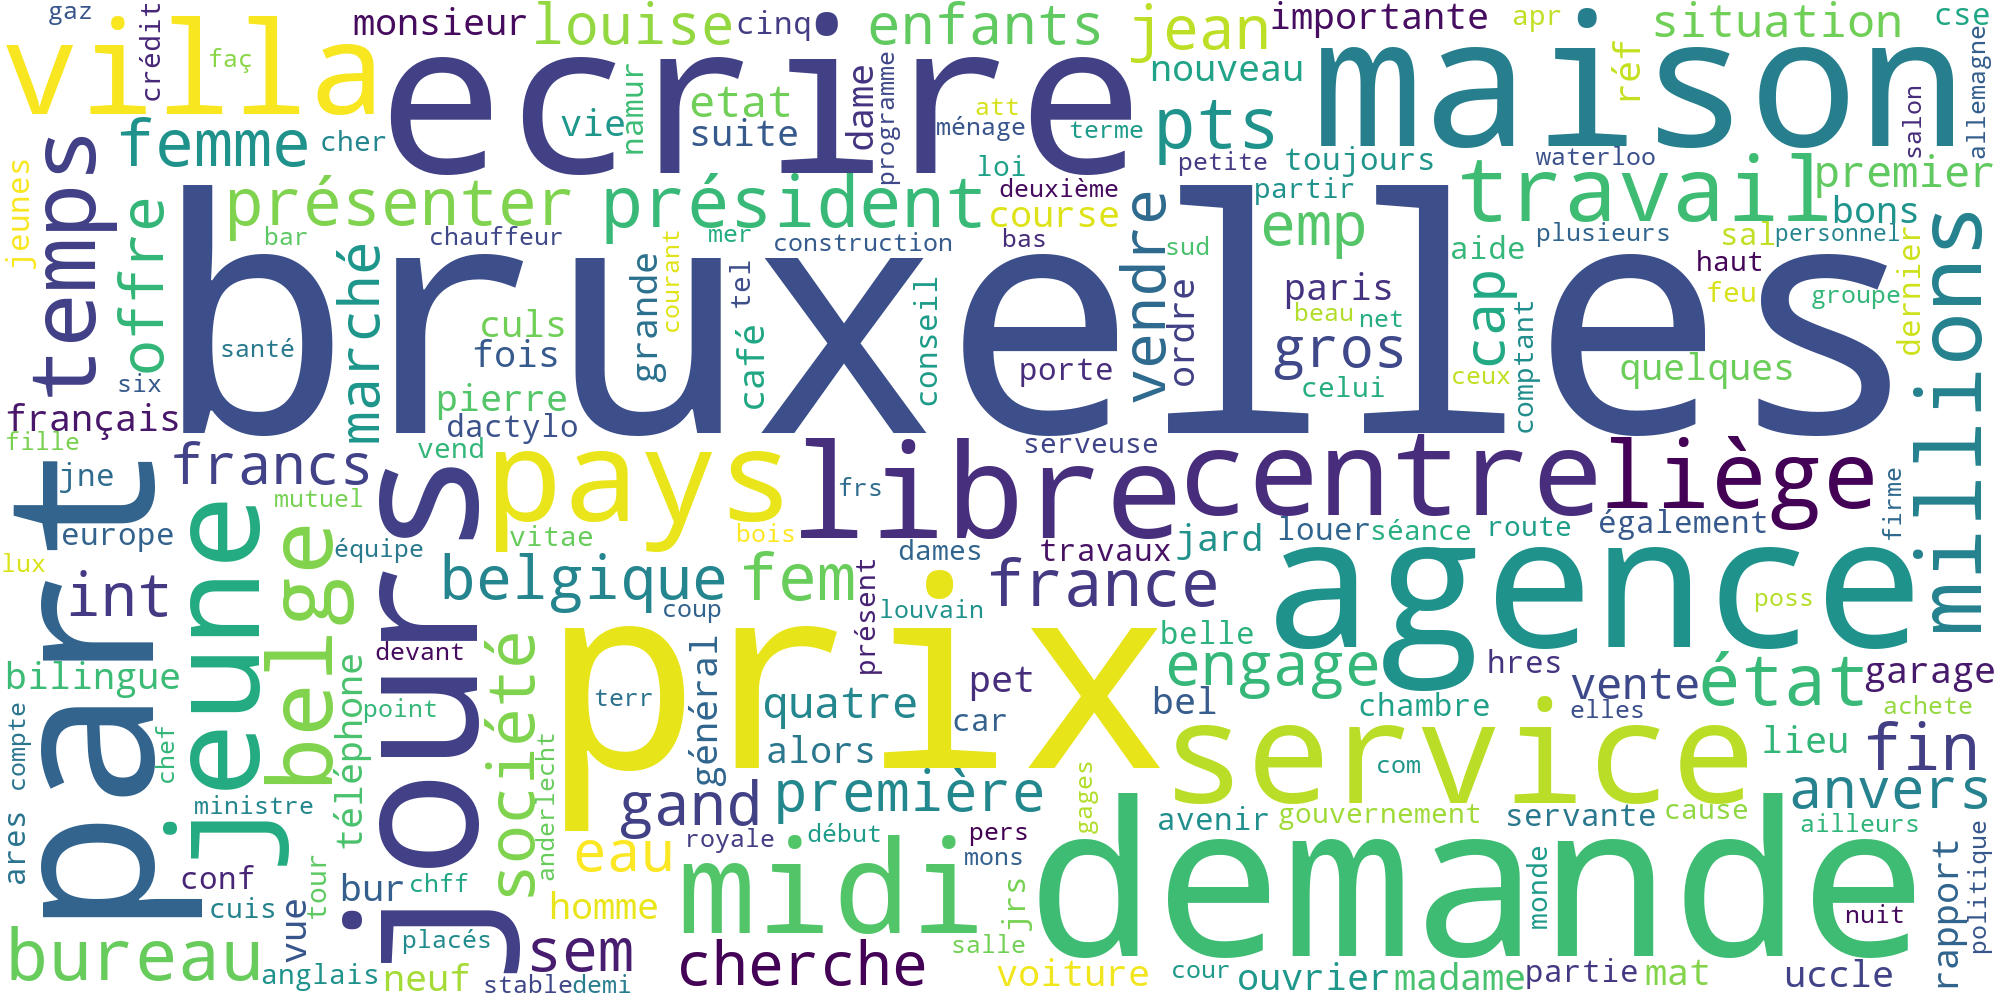

In [114]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))